In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange,uniform
from fancyimpute import KNN   

Using TensorFlow backend.


In [4]:
os.getcwd()

'C:\\Users\\lenovo\\Documents\\Python Scripts'

In [6]:
os.listdir("C:/lenovo/Documents/'Python Scripts'/")

FileNotFoundError: [WinError 3] The system cannot find the path specified: "C:/lenovo/Documents/'Python Scripts'/"

In [7]:
marketing_train = pd.read_csv("C:/Users/lenovo/Documents/Python Scripts/marketing_tr.csv")
print(marketing_train.shape)
marketing_train.head(10)


(7414, 22)


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
5,47.0,blue-collar,married,basic.4y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
6,35.0,services,single,NaN,no,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,yes
7,NaN,services,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no
8,28.0,unemployed,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,no
9,46.0,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no


In [8]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

In [ ]:
Missing Value Analysis

In [9]:
missing_val = pd.DataFrame(marketing_train.isnull().sum())
missing_val


,0
custAge,1804
profession,0
marital,0
schooling,2155
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,711


In [10]:
missing_val = missing_val.reset_index()
missing_val

,index,0
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [11]:
missing_val = missing_val.rename(columns={'index':  'variables', 0 : 'Missing_percentage'})
missing_val


,variables,Missing_percentage
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [12]:
missing_val['Missing_percentage']  = (missing_val['Missing_percentage']/len(marketing_train))*100
missing_val

,variables,Missing_percentage
0,custAge,24.332344
1,profession,0.000000
2,marital,0.000000
3,schooling,29.066631
4,default,0.000000
5,housing,0.000000
6,loan,0.000000
7,contact,0.000000
8,month,0.000000
9,day_of_week,9.589965


In [13]:
#sorting by missing %
missing_val = missing_val.sort_values(by='Missing_percentage',ascending=False).reset_index(drop=True)

#write to csv file
missing_val.to_csv("missing_val.csv")

In [14]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 40.01
#KNN = 31.33

#create missing value
marketing_train['custAge'].loc[70] = np.nan


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [16]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])

In [17]:
marketing_train.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
dtype: object

In [18]:
# Apply KNN Imputation

marketing_train = pd.DataFrame(KNN(k=3).fit_transform(marketing_train),columns= marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 30.722
Imputing row 101/7414 with 1 missing, elapsed time: 30.729
Imputing row 201/7414 with 0 missing, elapsed time: 30.736
Imputing row 301/7414 with 0 missing, elapsed time: 30.743
Imputing row 401/7414 with 0 missing, elapsed time: 30.750
Imputing row 501/7414 with 0 missing, elapsed time: 30.755
Imputing row 601/7414 with 0 missing, elapsed time: 30.761
Imputing row 701/7414 with 0 missing, elapsed time: 30.767
Imputing row 801/7414 with 1 missing, elapsed time: 30.772
Imputing row 901/7414 with 0 missing, elapsed time: 30.779
Imputing row 1001/7414 with 0 missing, elapsed time: 30.784
Imputing row 1101/7414 with 0 missing, elapsed time: 30.790
Imputing row 1201/7414 with 0 missing, elapsed time: 30.796
Imputing row 1301/7414 with 1 missing, elapsed time: 30.803
Imputing row 1401/7414 with 0 missing, elapsed time: 30.809
Imputing row 1501/7414 with 1 missing, elapsed time: 30.814
Imputing row 1601/7414 with 1 missing, elapsed time:

In [19]:
#Convert into proper datatypes
for i in lis:
    marketing_train.loc[:,i] = marketing_train.loc[:,i].round()
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')

In [20]:
marketing_train.dtypes  

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
dtype: object

# Outlier Analysis


In [21]:
#take backup
df  = marketing_train
#marketing_train = df
marketing_train.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x21d5a07af60>,
 'caps': [<matplotlib.lines.Line2D at 0x21d5a1058d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d5a07ae10>],
 'medians': [<matplotlib.lines.Line2D at 0x21d5a105f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d5a1152e8>],
 'means': []}

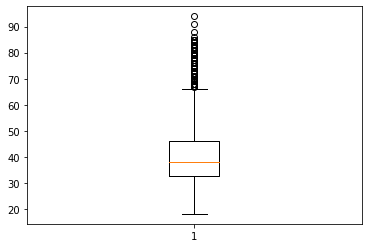

In [22]:
#%matpotlib inline
plt.boxplot(marketing_train['custAge'])

In [23]:
#take all numeric column names in a list

numeric_col = []
for i in range(0,marketing_train.shape[1]):
    if(marketing_train.iloc[:,i].dtypes == 'float64'):
        numeric_col.append(marketing_train.columns[i])
numeric_col

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [144]:
# calculate iqr and limits of boxplot
# Delete outliers
for i in numeric_col:
    q25,q75 = np.percentile(marketing_train.loc[:,i],[25,75])
    iqr = q75-q25
    
    minimum = q25 - (1.5*iqr)
    maximum = q75 + (1.5*iqr)
    
    marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i]<minimum].index)
    marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i]>maximum].index)
    
       

In [145]:
marketing_train.shape


(4413, 22)

In [24]:
#Detect and replace with NA
# #Extract quartiles
q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

#Calculate IQR
iqr = q75 - q25

#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

#Replace with NA
marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

#Calculate missing value
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Impute with KNN
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 28.890
Imputing row 101/7414 with 0 missing, elapsed time: 28.893
Imputing row 201/7414 with 0 missing, elapsed time: 28.894
Imputing row 301/7414 with 0 missing, elapsed time: 28.896
Imputing row 401/7414 with 0 missing, elapsed time: 28.898
Imputing row 501/7414 with 0 missing, elapsed time: 28.900
Imputing row 601/7414 with 0 missing, elapsed time: 28.901
Imputing row 701/7414 with 0 missing, elapsed time: 28.903
Imputing row 801/7414 with 0 missing, elapsed time: 28.905
Imputing row 901/7414 with 0 missing, elapsed time: 28.907
Imputing row 1001/7414 with 0 missing, elapsed time: 28.909
Imputing row 1101/7414 with 0 missing, elapsed time: 28.911
Imputing row 1201/7414 with 0 missing, elapsed time: 28.912
Imputing row 1301/7414 with 0 missing, elapsed time: 28.914
Imputing row 1401/7414 with 0 missing, elapsed time: 28.916
Imputing row 1501/7414 with 0 missing, elapsed time: 28.917
Imputing row 1601/7414 with 0 missing, elapsed time:

***************


(array([  2.,   3.,  11.,  18.,  30.,  44.,  68.,  94., 116., 136., 116.,
        100.,  74.,  63.,  52.,  29.,  25.,  13.,   4.,   2.]),
 array([-0.29498722, -0.26542556, -0.23586391, -0.20630225, -0.17674059,
        -0.14717893, -0.11761727, -0.08805561, -0.05849396, -0.0289323 ,
         0.00062936,  0.03019102,  0.05975268,  0.08931434,  0.11887599,
         0.14843765,  0.17799931,  0.20756097,  0.23712263,  0.26668429,
         0.29624595]),
 <a list of 20 Patch objects>)

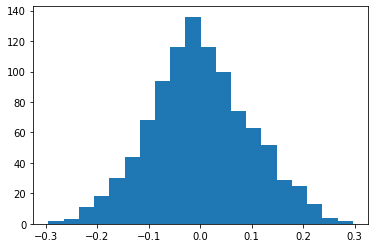

In [37]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print('***************')
plt.hist(s,bins=20)